In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Random Forrest Modelling

### Initial Model

In [58]:
train_test_data = pd.read_csv(r'E:\my-projs\wall-street-sentiments\data\train_test_data\train_test_data_new.csv')

In [59]:
train_test_data.dropna(inplace=True)
train_test_data

,timestamp,rank,ticker,name,mentions,mentioning_users,upvotes,sentiment,rank_24h_ago,mentions_24h_ago,...,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,dividend_exists,rank_percentage_change_24h,mentions_percentage_change_24h,opening_price,closing_price,label
0,06-18-2023,2,AMD,AMD,56,42.0,112,67.0,4,54.0,...,2.4000,0.000000,0.0451,22.20,0,-0.500000,0.037037,125.82,120.08,0
1,06-18-2023,3,TSLA,Tesla,48,45.0,462,51.0,3,61.0,...,27.9000,0.000000,0.0557,38.34,0,0.000000,-0.213115,258.92,260.54,1
2,06-18-2023,4,NVDA,NVIDIA,44,41.0,262,57.0,2,88.0,...,20.8800,0.037512,0.4467,-12.40,1,1.000000,-0.500000,434.50,426.92,0
4,06-18-2023,7,AAPL,Apple,32,30.0,226,70.0,10,20.0,...,165.7200,0.516101,1.7635,-0.24,1,-0.300000,0.600000,186.73,184.92,0
5,06-18-2023,9,DTE,DTE Energy,23,22.0,146,56.0,6,44.0,...,11.7500,3.344746,1.8338,-15.52,1,0.500000,-0.477273,114.56,114.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,06-16-2023,7,PLTR,Palantir,184,84.0,588,65.0,12,53.0,...,-7.1566,0.000000,0.0000,20.50,0,-0.416667,2.471698,16.87,16.30,0
386,06-16-2023,8,MSFT,Microsoft,126,82.0,613,73.0,24,35.0,...,38.4600,0.781385,0.3322,7.81,1,-0.666667,2.600000,351.32,342.33,0
387,06-16-2023,9,SPCE,Virgin Galactic,125,99.0,739,68.0,164,3.0,...,1.8000,0.000000,1.1349,-33.95,0,-0.945122,40.666667,5.72,4.73,0
388,06-16-2023,10,NKLA,Nikola,117,79.0,285,75.0,10,56.0,...,1.1500,0.000000,0.5830,3082.56,0,0.000000,1.089286,1.70,1.19,0


In [60]:
# Remove columns that are not needed for modelling

train_test_data = train_test_data.drop(
    ['name', 
     'ticker', 
     'timestamp',
    'opening_price',
   'closing_price',
   'rank_24h_ago',
   'mentions_24h_ago',
   'rank', 'dividend_exists'
    ], axis=1).sort_values(
    by=['mentions'], 
    ascending=False)

In [61]:
train_test_data

,mentions,mentioning_users,upvotes,sentiment,beta,earnings_per_share_ttm,price_to_equity_ttm,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,rank_percentage_change_24h,mentions_percentage_change_24h,label
220,3216,1370.0,30860,57.0,1.770654,1.7415,173.5333,18.66000,0.052394,0.4956,0.2200,-0.666667,10.694545,0
267,1684,1076.0,10793,68.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.6000,0.000000,1.284939,0
270,1401,856.0,8556,59.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.6000,0.000000,-0.170515,1
221,1363,889.0,8328,68.0,2.707838,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.6000,1.000000,3.168196,0
238,1268,738.0,24699,61.0,1.770654,1.7415,214.7679,18.66000,0.042127,0.4956,0.2200,0.000000,-0.584262,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,16,15.0,161,83.0,0.995169,2.0614,18.2810,18.24000,0.000000,1.6717,27.2400,-0.517241,0.600000,0
79,16,14.0,76,100.0,0.886050,8.1536,9.7048,13.41000,4.833334,3.5598,107.4333,-0.562500,1.666667,1
66,15,14.0,56,70.0,1.188162,5.8857,31.1836,165.72000,0.513369,1.7635,-0.2400,0.666667,-0.758065,1
68,12,13.0,110,0.0,0.683394,1.0993,3.2375,7.49000,0.000000,0.9927,62.1500,-0.714286,0.200000,1


In [62]:
train_test_data.value_counts('label')

label
1    210
0    170
Name: count, dtype: int64

In [63]:
x_train, x_test, y_train, y_test = train_test_split(train_test_data.drop('label', axis=1), train_test_data['label'], test_size=0.30, random_state=42)

In [64]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)

In [65]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [66]:
# Test classification report

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.39      0.44        51
           1       0.58      0.68      0.63        63

    accuracy                           0.55       114
   macro avg       0.54      0.54      0.53       114
weighted avg       0.54      0.55      0.54       114



In [67]:
# Train classification report

y_pred_train = clf.predict(x_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       147

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



### Hyper-parameter tuning

In [69]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [50, 100, 400, 400],
    'criterion': ['gini', 'entropy', 'log_loss']
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=1, verbose=4)
grid_search.fit(x_train, y_train)
grid_search.best_params_
clf = grid_search.best_estimator_


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.426 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.679 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.491 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.509 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.604 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=2, min_samples_leaf=2, min_

In [70]:
grid_search.best_params_   

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 50}

In [71]:
grid_search.best_score_

0.5679944095038435

In [77]:
grid_search.score(x_test, y_test)

0.5614035087719298

In [78]:
y_pred = grid_search.predict(x_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.35      0.42        51
           1       0.58      0.73      0.65        63

    accuracy                           0.56       114
   macro avg       0.55      0.54      0.53       114
weighted avg       0.55      0.56      0.55       114



In [84]:
import joblib
from datetime import datetime
joblib.dump(grid_search.best_estimator_, f'E:/my-projs/wall-street-sentiments/experimentation/models/random_forrest_model_{datetime.now().strftime("%Y-%m-%d%H-%M-%S")}.joblib')
grid_search.best_estimator_

RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=50)

In [81]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 50}

In [76]:
# bootstrap=True, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 rf classifier
# bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100

clf =  RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100)

clf.fit(x_train, y_train)

# Test classification report

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

# Train classification report

y_pred_train = clf.predict(x_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.53      0.33      0.41        51
           1       0.59      0.76      0.66        63

    accuracy                           0.57       114
   macro avg       0.56      0.55      0.54       114
weighted avg       0.56      0.57      0.55       114

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       119
           1       0.99      1.00      0.99       147

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266



In [ ]:
# random search cv

from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'bootstrap': [True],
    'max_depth': [None, 6, 8, 10, 12],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 1000, 10000],
    'criterion': ['gini', 'entropy', 'log_loss']
}
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=100, cv=5, verbose=3, random_state=42,
                                   n_jobs=1)
random_search.fit(x_train, y_train)
random_search.best_params_
clf = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.500 total time=   0.2s
[CV 2/5] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.567 total time=   0.2s
[CV 3/5] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.583 total time=   0.2s
[CV 4/5] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.483 total time=   0.2s
[CV 5/5] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.550 total time=   0.2s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=8, max_features=5, min_samples_lea

In [ ]:
random_search.best_score_

0.5599999999999999

In [ ]:
random_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=5,
                       min_samples_split=4, n_estimators=200)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.30      0.38        63
           1       0.52      0.73      0.61        66

    accuracy                           0.52       129
   macro avg       0.52      0.51      0.49       129
weighted avg       0.52      0.52      0.50       129



In [ ]:
# Training accuracy

y_pred_train = clf.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       133
           1       0.88      1.00      0.94       167

    accuracy                           0.92       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.93      0.92      0.92       300



### Visuallizing feature importance

In [ ]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances

,importance
mentions_percentage_change_24h,0.126243
sentiment,0.113388
rank_percentage_change_24h,0.102582
upvotes,0.095036
mentions,0.093358
mentioning_users,0.088863
price_to_equity_ttm,0.076910
beta,0.071228
revenue_growth_ttm_yoy,0.059466
return_on_equity_ttm,0.051797


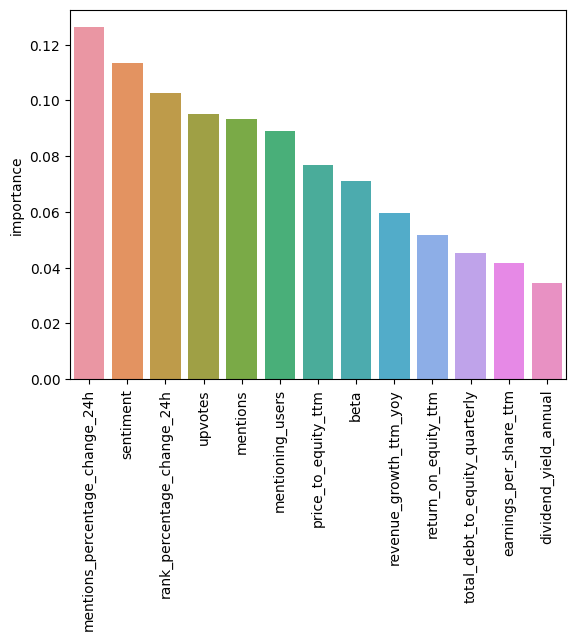

In [ ]:
# visualize the most important features
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()